# HTML
- Hypertext Markup Language
- < >: Tag
  - Tag name이 존재, Ex. <head> ... </head>: Tag open과 close가 존재
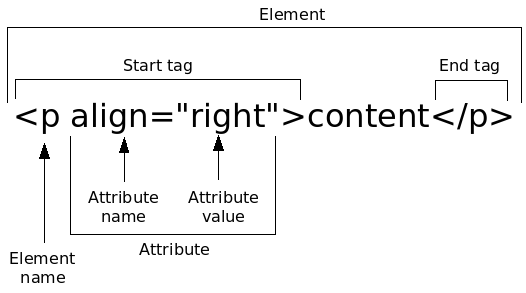
Reference: https://onlinelab.e-koreatech.ac.kr/tutorial/html?id=188

# Frame
- HTML내에 다른 HTML이 들어가 있는 section
- 복잡한 HTML내에 여러 구역을 분할하여 작업하기 위함


# Classification of HTML tags
https://pridiot.tistory.com/6


# Xpath


# Virtualbox
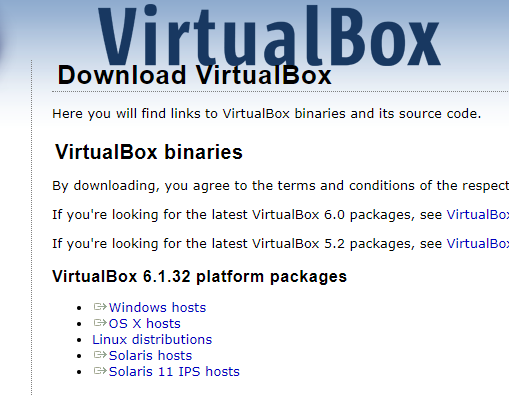
Reference: https://www.virtualbox.org/wiki/Downloads

- Click Windows hosts


In [1]:
from lxml import etree
import numpy as np
import pandas as pd

- Create simple XML

In [2]:
xml_str = """
<AAA>
  <BBB>1</BBB>
  <BBB>2</BBB>
  <CCC>
    <BBB>3</BBB>
    <XXX></XXX>
  </CCC>
</AAA>
"""
xml_doc = etree.XML(xml_str)
print(xml_doc)
print(type(xml_doc))
print(etree.tostring(xml_doc)) # Real print out

<Element AAA at 0x7f189ef88aa0>
<class 'lxml.etree._Element'>
b'<AAA>\n  <BBB>1</BBB>\n  <BBB>2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX/>\n  </CCC>\n</AAA>'


In [3]:
def print_xpath(expression, doc = xml_doc):
  for i, e in enumerate(doc.xpath(expression)):
    print('result {0}:'.format(i), etree.tostring(e))
  print('-'*20)

print_xpath('/AAA')       # '/' means root
print_xpath('/AAA/BBB')
print_xpath('//BBB')      # '//' means somewhere
print_xpath('//CCC')
print_xpath('//CCC/BBB')
print_xpath('//*')        # '*' means All
print_xpath('//CCC/*')
print_xpath('/*/BBB')

result 0: b'<AAA>\n  <BBB>1</BBB>\n  <BBB>2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX/>\n  </CCC>\n</AAA>'
--------------------
result 0: b'<BBB>1</BBB>\n  '
result 1: b'<BBB>2</BBB>\n  '
--------------------
result 0: b'<BBB>1</BBB>\n  '
result 1: b'<BBB>2</BBB>\n  '
result 2: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<CCC>\n    <BBB>3</BBB>\n    <XXX/>\n  </CCC>\n'
--------------------
result 0: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<AAA>\n  <BBB>1</BBB>\n  <BBB>2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX/>\n  </CCC>\n</AAA>'
result 1: b'<BBB>1</BBB>\n  '
result 2: b'<BBB>2</BBB>\n  '
result 3: b'<CCC>\n    <BBB>3</BBB>\n    <XXX/>\n  </CCC>\n'
result 4: b'<BBB>3</BBB>\n    '
result 5: b'<XXX/>\n  '
--------------------
result 0: b'<BBB>3</BBB>\n    '
result 1: b'<XXX/>\n  '
--------------------
result 0: b'<BBB>1</BBB>\n  '
result 1: b'<BBB>2</BBB>\n  '
--------------------


# Index start from 1
- Not from 0
- https://docs.python.org/3/library/xml.etree.elementtree.html

In [4]:
print_xpath('/*/BBB[1]')  # using index
print_xpath('/*/BBB[2]')  # using index
print_xpath('/*/BBB[3]')
print_xpath('/*/BBB[last()]')


result 0: b'<BBB>1</BBB>\n  '
--------------------
result 0: b'<BBB>2</BBB>\n  '
--------------------
--------------------
result 0: b'<BBB>2</BBB>\n  '
--------------------


# Attribute

In [9]:
xml_str = """
<AAA>
  <BBB id = '1'>1</BBB>
  <BBB id = '2'>2</BBB>
  <CCC>
    <BBB>3</BBB>
    <XXX class = 'x'></XXX>
    <XX class = 'x'></XX>
  </CCC>
  <XXX class = ' x'></XXX>
</AAA>
"""
xml_doc = etree.XML(xml_str)

def print_xpath(expression, doc = xml_doc):
  for i, e in enumerate(doc.xpath(expression)):
    print('result {0}:'.format(i), etree.tostring(e))
  print('-'*20)

- @: 특정 attribute가 있는 tag만 select

In [10]:
print_xpath('//BBB[@id]')
print_xpath('//BBB[@id = 2]')
print_xpath('//XXX[@class = x]')

result 0: b'<BBB id="1">1</BBB>\n  '
result 1: b'<BBB id="2">2</BBB>\n  '
--------------------
result 0: b'<BBB id="2">2</BBB>\n  '
--------------------
--------------------


In [11]:
print_xpath('//BBB[not(@id)]') # id attribute가 없는 BBB
print_xpath('//BBB[not(@*)]')  # BBB without any attribute

result 0: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<BBB>3</BBB>\n    '
--------------------


In [12]:
print_xpath('//XXX[@class = "x"]', xml_doc)
print_xpath('//XXX[normalize-space(@class) = "x"]', xml_doc)

result 0: b'<XXX class="x"/>\n    '
--------------------
result 0: b'<XXX class="x"/>\n    '
result 1: b'<XXX class=" x"/>\n'
--------------------


# Count
- Select by **counts** of specific tag

In [13]:
print_xpath('//*[count(BBB) = 2]', xml_doc)
print_xpath('//*[count(BBB) = 1]', xml_doc)
print_xpath('//*[count(XXX) = 1]', xml_doc)

result 0: b'<AAA>\n  <BBB id="1">1</BBB>\n  <BBB id="2">2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX class="x"/>\n    <XX class="x"/>\n  </CCC>\n  <XXX class=" x"/>\n</AAA>'
--------------------
result 0: b'<CCC>\n    <BBB>3</BBB>\n    <XXX class="x"/>\n    <XX class="x"/>\n  </CCC>\n  '
--------------------
result 0: b'<AAA>\n  <BBB id="1">1</BBB>\n  <BBB id="2">2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX class="x"/>\n    <XX class="x"/>\n  </CCC>\n  <XXX class=" x"/>\n</AAA>'
result 1: b'<CCC>\n    <BBB>3</BBB>\n    <XXX class="x"/>\n    <XX class="x"/>\n  </CCC>\n  '
--------------------


In [ ]:
print_xpath('//*[name() = "BBB"]')
print_xpath('//BBB') # Same thing
print_xpath('//*[starts-with(name(), "B")]')
print_xpath('//*[contains(name(), "X")]')

result 0: b'<BBB id="1">1</BBB>\n  '
result 1: b'<BBB id="2">2</BBB>\n  '
result 2: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<BBB id="1">1</BBB>\n  '
result 1: b'<BBB id="2">2</BBB>\n  '
result 2: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<BBB id="1">1</BBB>\n  '
result 1: b'<BBB id="2">2</BBB>\n  '
result 2: b'<BBB>3</BBB>\n    '
--------------------
result 0: b'<XXX class="x"/>\n  '
result 1: b'<XXX class=" x"/>\n'
--------------------


In [ ]:
print_xpath('//*[string-length(name()) = 2]')

result 0: b'<XX class="x"/>\n  '
--------------------


# Or operation
xpath **|** xpath

In [ ]:
print_xpath('//*[count(BBB) = 1] | //*[count(AAA) = 1]')

result 0: b'<CCC>\n    <BBB>3</BBB>\n    <XXX class="x"/>\n    <XX class="x"/>\n  </CCC>\n  '
--------------------


# Jupyter
- http://192.168.56.10:8888/
- password: loon

# Examples
- data.go.kr의 표준데이터셋에 있는 모든 데이터 이름 가져오기

In [ ]:
html_str = ''
with open('/content/drive/MyDrive/인공지능 학습/Data/데이터목록_공공데이터포털.html', encoding = 'utf8') as f:
  html_str = f.read()

#print(html_str)
html_str = html_str.replace('\n','')
html_str = html_str.replace('\t','')
html_doc = etree.HTML(html_str)
print(etree.tostring(html_doc))

b'<html lang="ko"><head><meta charset="UTF-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes"/><meta name="format-detection" content="telephone=no"/><meta name="title" property="og:title" content="&#44277;&#44277;&#45936;&#51060;&#53552; &#54252;&#53560;"/><meta name="description" property="og:description" content="&#44397;&#44032;&#50640;&#49436; &#48372;&#50976;&#54616;&#44256; &#51080;&#45716; &#45796;&#50577;&#54620; &#45936;&#51060;&#53552;&#47484;&#12302;&#44277;&#44277;&#45936;&#51060;&#53552;&#51032; &#51228;&#44277; &#48143; &#51060;&#50857; &#54876;&#49457;&#54868;&#50640; &#44288;&#54620; &#48277;&#47456;(&#51228;11956&#54840;)&#12303;&#50640; &#46384;&#46972; &#44060;&#48169;&#54616;&#50668; &#44397;&#48124;&#46308;&#51060; &#48372;&#45796; &#49789;&#44256; &#50857;&#51060;&#54616;&#44172; &#44277;&#50976;&#8226;&#54876;&#50857;&#54624; &#49688; &#51080;&#46020;&#47197; &#44277;&

- Title을 선택해서 pandas 형태로 전환

In [ ]:
x = html_doc.xpath('//span[contains(@class, "title")]/text()')
data = pd.Series(x)
print(data)

0             전국치매센터표준데이터
1            전국무료급식소표준데이터
2           전국공연행사정보표준데이터
3    전국소규모공공시설위험지정정보표준데이터
4         전국공공시설개방정보표준데이터
5          전국보행자전용도로표준데이터
6         전국여성안심지킴이집표준데이터
7             전국육교정보표준데이터
8      전국주정차금지(지정)구역표준데이터
9       전국전동휠체어급속충전기표준데이터
dtype: object


# Word properties crawling form dictionary site
- https://www.dictionary.com/browse/logjam


In [ ]:
html_str = ''
with open('/content/drive/MyDrive/인공지능 학습/Data/Logjam Definition & Meaning_Dictionary.html', encoding = 'utf8') as f:
  html_str = f.read()

html_str = html_str.replace('\n','')
html_str = html_str.replace('\t','')
html_doc = etree.HTML(html_str)


In [ ]:
word_list = []
#word_list.append(html_doc.xpath('//*[@id="top-definitions-section"]/div[2]/div[1]/h1/text()'))
word_list.append(html_doc.xpath('//h1/text()'))
word_list.append(html_doc.xpath('//*[@id="base-pw"]/main/section/section/div[1]/section[2]/div[1]/span/span/text()'))
word_list.append(html_doc.xpath('//h1/text()'))
word_list.append(html_doc.xpath('//h1/ancestor::div[3]//div[@value = 1]//span/text()'))
# word_list.append(html_doc.xpath('//*[@id="base-pw"]/main/section/section/div[1]/section[2]/div[2]/div[1]/span/text()'))
# word_list.append(html_doc.xpath('//*[@id="base-pw"]/main/section/section/div[1]/section[2]/div[2]/div[2]/span/text()'))
# word_list.append(html_doc.xpath('//*[@id="base-pw"]/main/section/section/div[1]/section[2]/div[2]/div[2]/span/span/text()'))
data = pd.Series(word_list)
print(data)

0                                             [logjam]
1                                               [noun]
2                                             [logjam]
3    [an immovable pileup or tangle of , ,  as in a...
dtype: object


- Child, Parent, Descendant, Ancestor
- descendant-or-self, ancestor-or-self
- following-sibling, preceding-sibling


In [14]:
xml_str = """
<AAA>
  <BBB id = '1'>1</BBB>
  <BBB id = '2'>2</BBB>
  <CCC>
    <BBB>3</BBB>
    <XXX class = 'x'>x1</XXX>
    <XX class = 'x'></XX>
  </CCC>
  <XXX class = ' x'>x2</XXX>
  <BA></BA>
</AAA>
"""
xml_doc = etree.XML(xml_str)

In [15]:
def print_xpath(expression, doc = xml_doc):
  for i, e in enumerate(doc.xpath(expression)):
    print('result {0}:'.format(i), etree.tostring(e))
  print('-'*20)

In [16]:
print_xpath('child::CCC')
# print_xpath('//CCC') # Same

print_xpath('//CCC/parent::*')
print_xpath('/AAA/descendant::*')
print_xpath('/AAA/descendant::BA') # BA tag of AAA's descendant
print_xpath('/AAA/descendant::XXX') # XXX tags of AAA's descendant
print_xpath('//XXX/ancestor::*')
print_xpath('//CCC/BBB/following-sibling::*') # Siblings (Same level)

result 0: b'<CCC>\n    <BBB>3</BBB>\n    <XXX class="x">x1</XXX>\n    <XX class="x"/>\n  </CCC>\n  '
--------------------
result 0: b'<AAA>\n  <BBB id="1">1</BBB>\n  <BBB id="2">2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX class="x">x1</XXX>\n    <XX class="x"/>\n  </CCC>\n  <XXX class=" x">x2</XXX>\n  <BA/>\n</AAA>'
--------------------
result 0: b'<BBB id="1">1</BBB>\n  '
result 1: b'<BBB id="2">2</BBB>\n  '
result 2: b'<CCC>\n    <BBB>3</BBB>\n    <XXX class="x">x1</XXX>\n    <XX class="x"/>\n  </CCC>\n  '
result 3: b'<BBB>3</BBB>\n    '
result 4: b'<XXX class="x">x1</XXX>\n    '
result 5: b'<XX class="x"/>\n  '
result 6: b'<XXX class=" x">x2</XXX>\n  '
result 7: b'<BA/>\n'
--------------------
result 0: b'<BA/>\n'
--------------------
result 0: b'<XXX class="x">x1</XXX>\n    '
result 1: b'<XXX class=" x">x2</XXX>\n  '
--------------------
result 0: b'<AAA>\n  <BBB id="1">1</BBB>\n  <BBB id="2">2</BBB>\n  <CCC>\n    <BBB>3</BBB>\n    <XXX class="x">x1</XXX>\n    <XX class="x"/>\n  <